### Welcome to the Airbnb Mini Practice Project

Throughout this unit on Python Data Analytics, you'be been introduced the the following powerful libraries:

<li> Matplotlib </li>
<li> Seaborn </li>
<li> Pandas </li> 
    
Each of these libraries will enhance your data analysis capabilities.

We've created this challenging exercise to reinforce your understanding of how these libraries work. 

Please note, there is a particular emphasis on the Pandas Library. This is the most critical Python library for data analytics. You'll see many similarities between Pandas and Pivot Tables!
    
<b> The most important thing you can do to build confidence with Python is to practice programming, all the time. This way you will build muscle memory. Don't simply copy the code you've written previously. Write it again and again so you store it in your memory. </b> 

<b> As this is a practice exercise, we've included a copy of what the outputs *should* look like for the majority of the questions to give you some guidance. </b>

<H3>  Time to get started! </H3>

Import the airbnb_2.csv file.

Once you do this, you can start your analysis.

<b> Don't forget to import the libraries you need to read .csv files! </b> 



### Step 1: <span style="color:green">Import Libraries</span> 
<b> Put your code in the box below. </b>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns

### Step 2: <span style="color:green">Import the Airbnb Dataset</span> 

Now that you have the Pandas Libraries imported, it's time to import the Airbnb dataset.

<b> i) Import the Airbnb dataset.

ii) Use .info() function to better understand the variables inside your dataset.
<p>    

<b> Put your code in the box below </b>

In [2]:
df = pd.read_csv('/Users/lucaspollock/desktop/airbnb_2.csv')

### Step 3: <span style="color:green">Exploring your data with Pandas</span> 

The rest of these questions will have you focus on using the following Pandas Skills:

<li> Subsetting a Pandas DataFrame using [] and boolean operators </li>
<li> Summing up records with value_counts()</li>
<li> Creating calculated fields </li>
<li> Group By in Pandas </li> 
<li> Creating Bar Plots with Matplotlib</li> 



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<b> i)  Please count how many Airbnb listings are in each of the 5 Neighbourhood Groups (Manhattan, Brooklyn, Queens, Bronx, Staten Island), then identify which Neighbourhood Groups have the greatest number of Airbnb listings. </b>
<p>
    <b> Put your code in the box below </b>

We want to focus our attention on the 3 most popular Neighbourhood Groups, by listing volume.

<b> ii) Calculate the percentage of Airbnb listings that each Neighbourhood Group contains. </b>

See this resource for more details <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>. </a>

<b> Put your code in the box below. </b>

In [5]:
# Neighborhood count

group_count = df['neighbourhood_group'].value_counts()
total_count = df['neighbourhood_group'].count()
print(group_count)
print(f'total count: {total_count}')

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64
total count: 48895


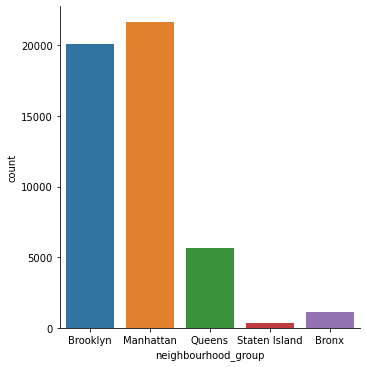

In [6]:
sns.catplot(x='neighbourhood_group', data=df, kind='count')

In [7]:
# neighborhood percentage

percentage_group = (group_count/total_count) * 100
print(percentage_group)

Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: neighbourhood_group, dtype: float64


<b> iii) Create a new calculated field called Revenue and place this into the Airbnb DataFrame. This is to be calculated by using the Price Column x Number_Of_Reviews Columns </b>

<b> Put your code in the box below </b>

In [8]:
df['Revenue'] = df['price'] * df['number_of_reviews']

<b> iv) Create a Bar Plot that shows which Neighbourhood Group has the highest average revenues. In order to best
calculate this, you'd want to consider how you can use the .groupby() syntax to assist you! </b>

If you're stuck, we recommend you go back to this <a href = https://learn.datacamp.com/courses/manipulating-dataframes-with-pandas> DataCamp link</a>. Specifically, Chapter 4 which covers how GROUP BY is used in Pandas.

<b> Put your code in the box below. </b>

In [9]:
NB_revs = df.groupby('neighbourhood_group')['Revenue'].mean()
print(NB_revs)

neighbourhood_group
Bronx            1999.439963
Brooklyn         2927.567400
Manhattan        3375.960574
Queens           2400.151077
Staten Island    2541.764075
Name: Revenue, dtype: float64


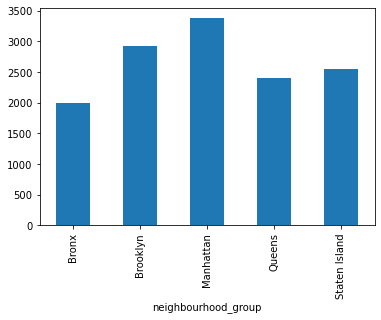

In [10]:
NB_revs.plot(kind='bar')
plt.show()

<h3> <span style="color:green">Challenge Questions</span> </h3>

<b> V) Filter the Airbnb DataFrame to include only the Neighbourhood Groups Manhattan, Brooklyn, and Queens. 
    
Then, identify the top 3 Revenue Generating Neighborhoods within each of the 3 Neighbourhood_Groups. This should give us 9 Overall Rows: 3 of the top generating neighbourhoods within each of the 3 Neighbourhood_Groups </b>

This is a tricky question that will *test* your group-by skills.

We recommend you consider the following:

    condition1 = someDataFrame['someColumn']=='someCondition'
    condition2 = someDataFrame['someColumn']=='someCondition'
    
    Step One - Filter the DataFrame using the Conditions
    filtered_dataframe = someDataFrame[condition1 OR condition 2] 
    #Hint: You might want to look up what the OR symbol in Python is represented as in operator form (i.e. AND (&) )
    
    Step Two - Group the Data by Neighbourhood_Group and Neighbourhood. Don't forget you're looking to SUM up the Revenues.
    
    The remaining steps we recommend you think very carefully about.
    
    You might want to make use of the .reset_index(inplace=True) function to help reset the indexes in 
    your Grouped Up Dataframe...!
    
    
<b> Put your code in the box below. </b>

In [23]:
condition1 = df['neighbourhood_group'] == 'Manhattan'
condition2 = df['neighbourhood_group'] == 'Brooklyn'
condition3 = df['neighbourhood_group'] == 'Queens'

In [25]:
step1 = df[condition1 | condition2 | condition3]
step2 = step1.groupby(['neighbourhood_group', 'neighbourhood'])['Revenue'].sum().sort_values(ascending=False).reset_index()
manhattan_df = step2[step2['neighbourhood_group'] == 'Manhattan'].head(3)
queens_df = step2[step2['neighbourhood_group'] == 'Queens'].head(3)
brooklyn_df = step2[step2['neighbourhood_group'] == 'Brooklyn'].head(3)


In [34]:
join = pd.concat([manhattan_df, queens_df, brooklyn_df]).reset_index()
print(join)

   index neighbourhood_group       neighbourhood   Revenue
0      2           Manhattan              Harlem   8598692
1      3           Manhattan      Hell's Kitchen   8238991
2      4           Manhattan        East Village   7574535
3     17              Queens             Astoria   1880840
4     28              Queens    Long Island City   1374945
5     33              Queens            Flushing   1140450
6      0            Brooklyn        Williamsburg  12389011
7      1            Brooklyn  Bedford-Stuyvesant  12352457
8      8            Brooklyn            Bushwick   4762224


In [22]:
top3 = df[(df['neighbourhood_group'] == 'Queens') | (df['neighbourhood_group']== 'Manhattan') | (df['neighbourhood_group'] == 'Brooklyn')]


neighbourhood
Arverne                300939
Astoria               1880840
Bath Beach              33486
Battery Park City       72628
Bay Ridge              310019
                       ...   
Whitestone              15641
Williamsburg         12389011
Windsor Terrace        502266
Woodhaven              145921
Woodside               537139
Name: Revenue, Length: 130, dtype: int64


In [12]:
top3_3 = top3.groupby('neighbourhood')['Revenue'].sum()
print(top3_3)

neighbourhood
Arverne                300939
Astoria               1880840
Bath Beach              33486
Battery Park City       72628
Bay Ridge              310019
                       ...   
Whitestone              15641
Williamsburg         12389011
Windsor Terrace        502266
Woodhaven              145921
Woodside               537139
Name: Revenue, Length: 130, dtype: int64


<b> VI) Filter the Airbnb Dataframe to include only the top 3 Neighbroos within each neighbourhood_group. 
    
After doing this, identify the top average revenue-generating room-type for each of the nine neighbourhoods and plot this  in a Bar Chart.</b>

This is a tricky question that will *test* your group-by skills. Think back to the previous question and how you approached this; you can approach this in a similar manner. 

We recommend you consider the following:

    condition1 = someDataFrame['someColumn']=='someCondition'
    condition2 = someDataFrame['someColumn']=='someCondition'
    
    Step One - Filter the Dataframe using the Conditions
    filtered_dataframe = someDataFrame[condition1 OR condition 2] 
    #Hint: You might want to look up what the OR symbol in Python is represented as in operator form (i.e. AND (&) )
    
    Step Two - Group the Data by Neighbourhood_Group and Neighbourhood. Don't forget you're looking to SUM up the Revenues.
    
    The remaining steps we recommend you think very carefully about.
    
    You might want to make use of the .reset_index(inplace=True) function to help reset the indexes in 
    your Grouped Up Dataframe...!
    
    
 <b> Put your code in the box below. </b>      

In [37]:
top_neigh = join['neighbourhood']

In [38]:
print(top_neigh)

0                Harlem
1        Hell's Kitchen
2          East Village
3               Astoria
4      Long Island City
5              Flushing
6          Williamsburg
7    Bedford-Stuyvesant
8              Bushwick
Name: neighbourhood, dtype: object


In [46]:
condition_1 = top_neigh == 'Harlem'
condition_2 = top_neigh == "Hell's Kitchen"
condition_3 = top_neigh == 'East Village'
condition_4 = top_neigh == 'Astoria'
condition_5 = top_neigh == 'Long Island City'
condition_6 = top_neigh == 'Flushing'
condition_7 = top_neigh == 'Williamsburg'
condition_8 = top_neigh == 'Bedford-Stuyvesant'
condition_9 = top_neigh == 'Bushwick'

In [47]:
step_1 = join[condition_1 | condition_2|condition_3|condition_4|condition_5|condition_6|condition_7|condition_8|condition_9]

In [49]:
step_2 = step1.groupby(['neighbourhood', 'room_type'])['Revenue'].mean().sort_values(ascending=False).reset_index()

In [52]:
harlem_df = step_2[step_2['neighbourhood'] == 'Harlem'].head(1)
hell_df = step_2[step_2['neighbourhood'] == "Hell's Kitchen"].head(1)
east_df = step_2[step_2['neighbourhood'] == 'East Village'].head(1)
astoria_df = step_2[step_2['neighbourhood'] == 'Astoria'].head(1)
long_df = step_2[step_2['neighbourhood'] == 'Long Island City'].head(1)
flush_df = step_2[step_2['neighbourhood'] == 'Flushing'].head(1)
will_df = step_2[step_2['neighbourhood'] == 'Williamsburg'].head(1)
bed_df = step_2[step_2['neighbourhood'] == 'Bedford-Stuyvesant'].head(1)
bush_df = step_2[step_2['neighbourhood'] == 'Bushwick'].head(1)

In [61]:
joined = pd.concat([harlem_df,hell_df,east_df,astoria_df,long_df,flush_df,will_df,bed_df,bush_df])
print(joined)

          neighbourhood        room_type      Revenue
29               Harlem  Entire home/apt  4991.899614
38       Hell's Kitchen     Private room  4713.443452
31         East Village  Entire home/apt  4871.841880
122             Astoria  Entire home/apt  2845.629921
95     Long Island City  Entire home/apt  3303.504167
30             Flushing  Entire home/apt  4879.349057
42         Williamsburg  Entire home/apt  4659.608673
16   Bedford-Stuyvesant  Entire home/apt  5923.995600
62             Bushwick  Entire home/apt  4128.241888


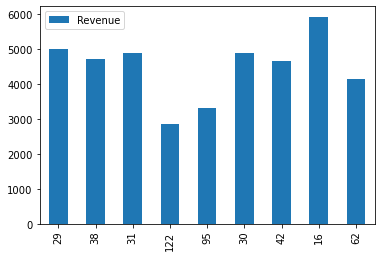

In [62]:
joined.plot(kind='bar')
tick_label = ['Harlem', "Hell's Kitchen", 'East Village', 'Astoria', 'Long Island City', 'Flushing', 'Williamsburg', 'Bedford-Stuyvesant', 'Bushwick']
plt.show()